<h1>Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h1>

<h3>Лабораторна робота № 4</h3>

<h3>Яцини Дениса</h3>

1. Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.

In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats as sts 

In [3]:
new_df = pd.DataFrame({
    'Normal_data': np.random.normal(loc=10, scale=5, size=20),
    'Normal_data_01': np.random.standard_normal(size=20),
    'Normal_data_02': np.random.randn(20),
    'Sample_random_data': np.random.random_sample(size=20),
    'Logistic_data': np.random.logistic(loc=3, scale=7, size=20),
    'Uniform_data': np.random.uniform(size=20),
})

new_df

,Normal_data,Normal_data_01,Normal_data_02,Sample_random_data,Logistic_data,Uniform_data
0,15.681785,2.466593,-0.211178,0.046206,22.304135,0.836618
1,15.115804,-1.273876,0.061663,0.919977,12.218336,0.176847
2,11.990987,0.444327,-1.940727,0.055870,-16.809527,0.571691
3,12.873452,-1.566337,-2.206393,0.864065,5.477158,0.508859
4,12.060910,-1.409090,-0.603918,0.570610,-3.763216,0.498420
5,18.423008,0.621224,-0.027478,0.317621,15.177729,0.367321
6,15.168851,-1.015494,2.734577,0.059634,7.909351,0.464904
7,17.408460,1.315900,-1.125200,0.695048,6.033125,0.538498
8,14.576535,0.575258,0.106517,0.525969,29.769731,0.731232
9,6.259116,0.439738,0.600894,0.863250,6.673484,0.203203


In [4]:
new_df = pd.DataFrame({key: sorted(values) for key, values in new_df.transpose().iterrows()})

In [5]:
def func(array,n):
    al=0
    for i in range(n):
        al+=array[i]
    return al/n
func_value = {i: func(new_df[i],20) for i in new_df}

In [12]:
def func_2(array,n,_func):
    p=0
    for i in range(n):
        p+=((array[i]-_func)**2)
    return p
func_2_value = {i: func_2(new_df[i],20,func_value[i]) for i in new_df}

In [13]:
a = [0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def func_3(array, n):
    m=0
    for i in range(n//2):
        m+=(a[i]*(array[(n-1)-i]-array[i]))
    return m

func_3_value = {i: func_3(new_df[i],20) for i in new_df}

In [17]:
def func_4(b_v,_s_sqq):
    return (b_v**2)/_s_sqq

func_4_value = {i: func_4(func_3_value[i], func_2_value[i]) for i in new_df}

WTheory = sts.shapiro(new_df['Normal_data'])
func_4_value, WTheory

({'Normal_data': 0.8989023168417247,
  'Normal_data_01': 0.948875170596598,
  'Normal_data_02': 0.9563327352859583,
  'Sample_random_data': 0.9418848641050772,
  'Logistic_data': 0.9524471670036716,
  'Uniform_data': 0.9550304151456313},
 (0.8988612294197083, 0.03926250338554382))

Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.

In [19]:
col_name = ["Variable","Statistics","Distribution"]
df = pd.DataFrame(columns = col_name)
df

,Variable,Statistics,Distribution


Занести в стовпчик Variable назви змінних.

In [20]:
df["Variable"] = new_df.keys()
df

,Variable,Statistics,Distribution
0,Normal_data,NaN,NaN
1,Normal_data_01,NaN,NaN
2,Normal_data_02,NaN,NaN
3,Sample_random_data,NaN,NaN
4,Logistic_data,NaN,NaN
5,Uniform_data,NaN,NaN



1. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [27]:
df["Distribution"]=['normal' if 'Normal_data' in i else 'non-normal'
                          for i in df["Variable"]]
df

,Variable,Statistics,Distribution
0,Normal_data,NaN,normal
1,Normal_data_01,NaN,normal
2,Normal_data_02,NaN,normal
3,Sample_random_data,NaN,non-normal
4,Logistic_data,NaN,non-normal
5,Uniform_data,NaN,non-normal


Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення.

In [38]:
for i in range(df.shape[0]):
    if 'Normal' in df["Variable"][i]:
        df['Statistics'][i] = f'{new_df[df["Variable"][i]].mean()} {[new_df[df["Variable"][i]].std()]}'
df

,Variable,Statistics,Distribution
0,Normal_data,11.179251774408554 [5.466714082227667],normal
1,Normal_data_01,-0.1026428741121567 [1.184968525788309],normal
2,Normal_data_02,-0.2389173933800115 [1.1929496900137024],normal
3,Sample_random_data,NaN,non-normal
4,Logistic_data,NaN,non-normal
5,Uniform_data,NaN,non-normal


Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. 

In [41]:
for i in range(df.shape[0]):
    if 'Normal' not in df["Variable"][i]:
        df['Statistics'][i] = f'{new_df[df["Variable"][i]].median()} [{new_df[df["Variable"][i]].quantile(0.25)}; {new_df[df["Variable"][i]].quantile(0.75)}]'
df

,Variable,Statistics,Distribution
0,Normal_data,11.179251774408554 [5.466714082227667],normal
1,Normal_data_01,-0.1026428741121567 [1.184968525788309],normal
2,Normal_data_02,-0.2389173933800115 [1.1929496900137024],normal
3,Sample_random_data,0.44700454172784476 [0.2760990629784379; 0.660...,non-normal
4,Logistic_data,6.850801505975948 [-1.9078420309282578; 13.322...,non-normal
5,Uniform_data,0.4798543728195902 [0.34104456680229656; 0.596...,non-normal


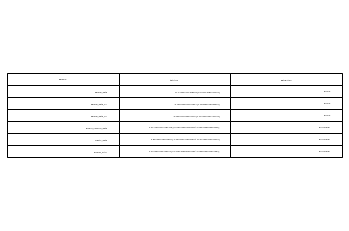

In [43]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

cell_text = []
for row in range(len(df)):
    cell_text.append(df.iloc[row])

ax.table(cellText = cell_text, colLabels = df.columns, loc = 'center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output_table.pdf")
pdf.savefig(fig)
pdf.close()